# BLACK OR WHITE

KNN works very well on at least one third of the classification problems

*Trevor Hastie*

Confrontare il knn, albero decisionale, regressione logistica (ovo, ova) contro algoritmi quali svm, boosted tree, extreme random trees, random forests.

In [ ]:
import numpy as np

In [4]:
# importing data
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1)

In [5]:
# data
X, y = mnist["data"], mnist["target"]

In [ ]:
X.iloc[1]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 1, Length: 784, dtype: int64

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
ss = StratifiedShuffleSplit(n_splits=1, test_size = 10000)

X_train_val_idx, X_test_idx = next(ss.split(X,y))

# test set
X_test = X.iloc[X_test_idx]
y_test = y.iloc[X_test_idx]

# train-validation set 
X_train_val, y_train_val = X.iloc[X_train_val_idx], y.iloc[X_train_val_idx]
X_train_idx, X_val_idx = next(ss.split(X_train_val, y_train_val))

# validation set
X_val, y_val = X_train_val.iloc[X_val_idx], y_train_val.iloc[X_val_idx]

# training set
X_train, y_train = X_train_val.iloc[X_train_idx], y_train_val.iloc[X_train_idx]

In [7]:
# white box models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [8]:
# black box models
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier

In [9]:
# fine-tuning
from sklearn.model_selection import GridSearchCV

In [10]:
# dimensionality reduction for speedig-up the training process
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)

X_red = pca.fit_transform(X)
X_train_val_red = X_red[X_train_val_idx]
X_val_red = X_train_val_red[X_val_idx]
X_train_red = X_train_val_red[X_train_idx]
X_test_red = X_red[X_test_idx]

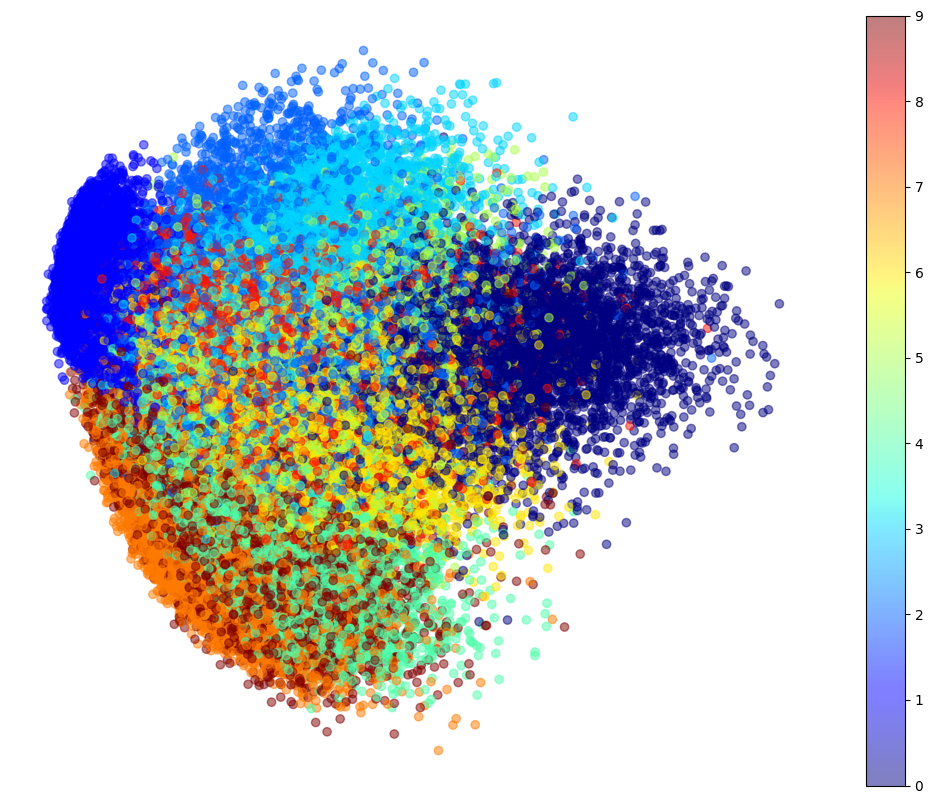
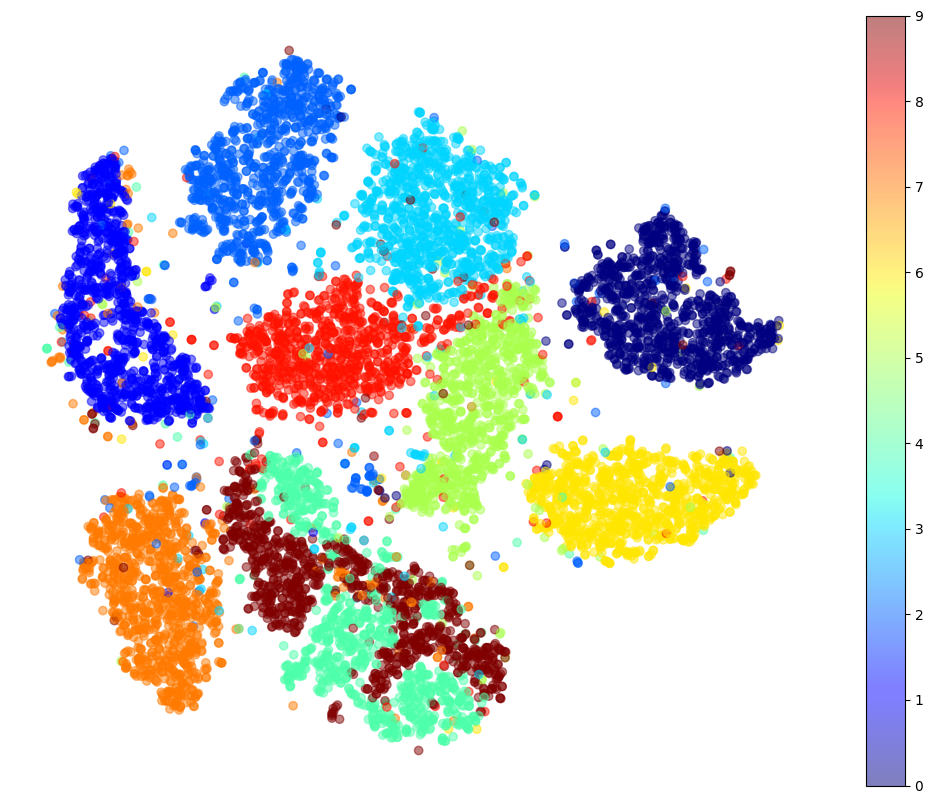

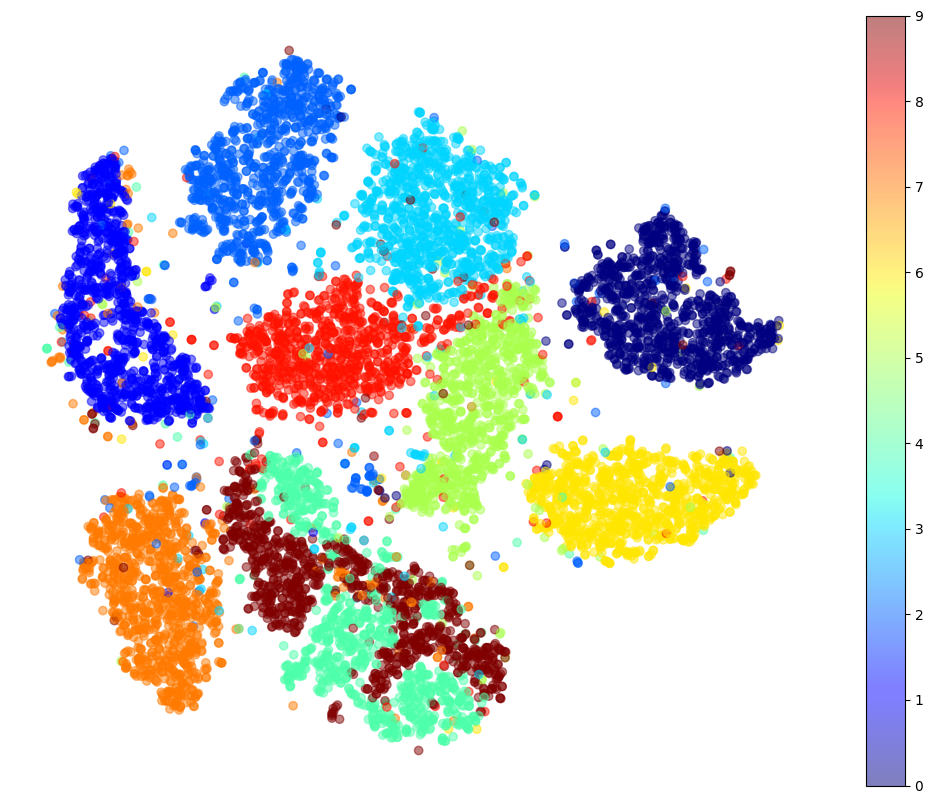

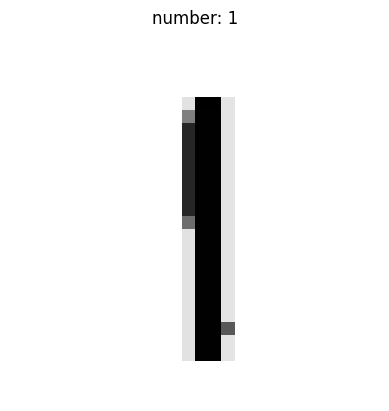

In [20]:
# example
import matplotlib.pyplot as plt
import pandas as pd

X_train_plot = X_train.to_numpy()
    
some_face = X_train_plot[67] # changing the index here shows a different number
some_face_image = some_face.reshape(28,28)

plt.imshow(some_face_image, cmap = "binary")
plt.title(f"number: {y_train[67]}")
plt.axis("off")
plt.show()

In [ ]:
print(f"Riduzione di {X_train.shape[1]-X_train_red.shape[1]} dimensioni")

Riduzione di 453 dimensioni


## White Box models

Now we fine-tune (using grid-search) everyone of these simple models. We will use accuracy as performance measure. 

#### KNN

In [ ]:
# training the knn (time: 2m 45s)
knn = KNeighborsClassifier()
param_grid = {"n_neighbors" : [5, 10, 20, 30, 40, 50, 60, 70, 80]}
knn = GridSearchCV(estimator= knn, param_grid=param_grid, cv = 3, n_jobs=-1)
knn.fit(X_train_red, y_train) 

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80]})

In [ ]:
knn.best_params_

{'n_neighbors': 5}

In [ ]:
knn.score(X_val_red, y_val)
# 0.9675

0.9675

#### Logistic regression

Using One versus one classifier. We train a classifier for every possible pair of classes. The predicted class corresponds to the one that wins the most "duels".

In [ ]:
# training the Logistic Regression model (time: 10s)
lr_ovo = OneVsOneClassifier(LogisticRegression(), n_jobs=-1)
lr_ovo.fit(X_train_red, y_train) 

OneVsOneClassifier(estimator=LogisticRegression(), n_jobs=-1)

In [ ]:
lr_ovo.score(X_val_red, y_val)
# 0.9171

0.9171

Using One versus Rest classification. We train a classifier for each possible class. This approach requires that each model predicts a class membership probability or a probability-like score. The argmax of these scores (class index with the largest score) is then used to predict a class.

In [ ]:
 # training the Logistic Regression model (time: 15 s)
lr_ovr = OneVsRestClassifier(LogisticRegression(), n_jobs=-1)
lr_ovr.fit(X_train_red, y_train) 

OneVsRestClassifier(estimator=LogisticRegression(), n_jobs=-1)

In [ ]:
lr_ovr.score(X_val_red, y_val)
# 0.77

0.77

#### Naive Bayes

We model the prior using a Multinomial distribution, in accord to the discrete nature of the response variable. For this reason we fit the model on the non-reduced dataset.

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
mnb.score(X_val, y_val)
# 0.8295

0.8295

Now we model the prior using a multivariate normal distribution. In this case we can use the reduced set, since there's no more need of discrete values for the features.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_red, y_train)

GaussianNB()

In [ ]:
gnb.score(X_val_red, y_val)
# 0.8

0.8069

#### Decision Trees 

## Black Box models

The idea behind the project is looking at the performance of fine-tuned simple black-box models, against the performance of black box models. For this reason we make the decision to use the black box models, as they come, without fine-tuning them. 

#### Random Forest

In [ ]:
# time: 3m 9s
rf = RandomForestClassifier()
rf.fit(X_train_red, y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_val_red, y_val)
# 0.9366

0.9366

#### Extremely Randomized Trees

In [ ]:
# time: 39 s
ert = ExtraTreesClassifier(random_state=42)
ert.fit(X_train_red, y_train)

ExtraTreesClassifier(random_state=42)

In [ ]:
ert.score(X_val_red, y_val)
# 0.9319

0.9319

#### Support Vector Classifier

Utilizzeremo un kernel lineare.

In [ ]:
# time: 22m
svc = LinearSVC()
svc.fit(X_train_red, y_train)

LinearSVC()

In [ ]:
svc.score(X_val_red, y_val)
# 0.9125

0.9125

#### Boosted Trees

In [ ]:
# time: >45 min (100 trees) - time: 14m (10 trees)
bt = GradientBoostingClassifier(n_estimators=10)
bt.fit(X_train_red, y_train)

GradientBoostingClassifier(n_estimators=10)

In [ ]:
bt.score(X_val_red, y_val)
# training not finished (100 trees) - 0.7934

0.7934

make table showing the reuslts with columns as:
- training time needed
- performance

as rows:
- model names and chosen hyperparameters

The performance measure used was the accuracy